# Introduction

See the README file of the lesson.

# Loading the tidyverse lesson and dataset downloading

 ## Load the library   

In [61]:
library(tidyverse,warn.conflicts = FALSE)

## Data import and first insight into the data

In [62]:
# read data directly from github
#df = read_csv("https://raw.githubusercontent.com/OHI-Science/data-science-training/master/data/ca.csv") 

# let's take a look at it
#glimpse(df)

In [63]:
# set seed to reproduce results
set.seed(123456)

# column 'genotype'
wildtype = c(paste(rep("wt",10),seq(1,10,1),sep = "-"))
hairy = c(paste(rep("hairy",10),seq(1,10,1),sep = "-"))
bald = c(paste(rep("bald",10),seq(1,10,1),sep = "-"))
genotype = c(wildtype,hairy,bald)

# column with petra and peter
scientist = c(
  rep("petra",5),
  rep("peter",5),
  rep("petra",5),
  rep("peter",5),
  rep("petra",5),
  rep("peter",5)
)

# one column for leaf bottom side and one for leaf upper side
## upper side
u_wt = rnorm(n = 10,mean = 100,sd = 20)
u_hairy = rnorm(n = 10,mean = 500,sd = 50)
u_bald = rnorm(n = 10,mean = 20,sd = 8)
upper = c(u_wt,u_hairy,u_bald)
## lower side  
d_wt = u_wt + runif(n = 10,min = 0,max = +50)
d_hairy = u_hairy + runif(n = 10,min = 100,max = +500)
d_bald = u_bald + runif(n = 10,min = 50,max = +100)
lower = c(d_wt,d_hairy,d_bald)

df = data.frame(
  genotype = genotype,
  scientist = scientist,
  upper = upper,
  lower = lower)
head(df)

genotype,scientist,upper,lower
wt-1,petra,116.67466,126.47645
wt-2,petra,94.47904,95.45805
wt-3,petra,92.89996,119.28633
wt-4,petra,101.74975,110.83123
wt-5,petra,145.04511,152.43185
wt-6,peter,116.68920,146.23790


# Identify the experimental factors and convert to tidy format

**Question**: How would you calculate the mean and standard deviation of the trichome counts per person? Is it easy to do?  

**Question**: what are other potential problems with this dataset? What columns need to be changed?

**Question**: how would the corresponding tidy dataset look like?

## First operation on the genotype column
First let's separate the genotype column into a genotype and a biological replicate column.  
We will use the `separate` function from the `tidyr` package to do so.

In [64]:
df.parsed = separate(data = df,col = genotype,into = c("genotype","replicate"))
# let's see how it looks
head(df.parsed)

genotype,replicate,scientist,upper,lower
wt,1,petra,116.67466,126.47645
wt,2,petra,94.47904,95.45805
wt,3,petra,92.89996,119.28633
wt,4,petra,101.74975,110.83123
wt,5,petra,145.04511,152.43185
wt,6,peter,116.68920,146.23790


## Creating a new variable
Then let's reshape the dataframe so that `upper` and `lower` column are transformed into rows.  
They are indeed experimental variables corresponding to the __side of the leaf__ and should have their own column according to the tidy principle. 

In [65]:
# let's make this tidy!
df.tidy = gather(
    data = df.parsed,
    key = "side",      # we define a new variable
    value = counts,    # we give a name to the column that will contain the observation values
    -genotype,-replicate,-scientist) # tells to leave these variables out since they are already well defined
head(df.tidy)

genotype,replicate,scientist,side,counts
wt,1,petra,upper,116.67466
wt,2,petra,upper,94.47904
wt,3,petra,upper,92.89996
wt,4,petra,upper,101.74975
wt,5,petra,upper,145.04511
wt,6,peter,upper,116.68920


Ok so now each variable has its own column.  
Each observation has its own row.  
**It is tidy!**

# Data exploration

## Counts = f(genotype)
Are the trichome counts dependent on the genotype variable?

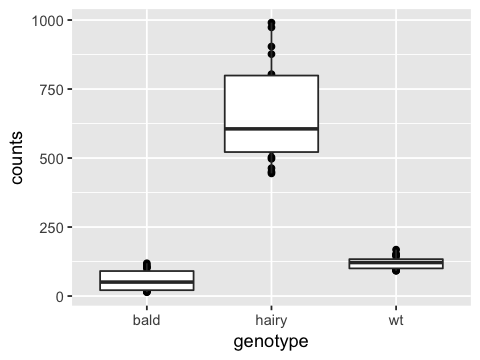

In [66]:
# Change plot size to 4 x 3
options(repr.plot.width=4, repr.plot.height=3)

ggplot(df.tidy,mapping = aes(x = genotype,y=counts)) +
geom_point() +
geom_boxplot()

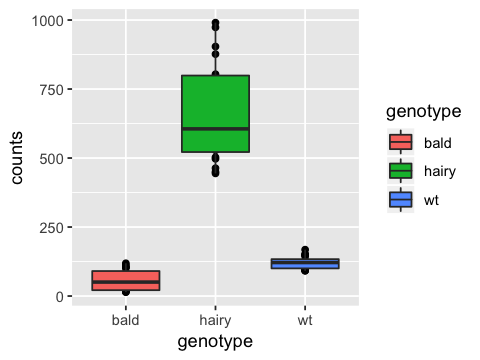

In [67]:
# we can also add some colors to make it look nicer
ggplot(df.tidy,mapping = aes(x = genotype,y=counts,fill=genotype)) +
geom_point() +
geom_boxplot()

## Counts = f(genotype,side)

It seems that the genotype is very important for trichome counts. But we might have omitted the leaf side as an explanatory variable. Let's plot it too.

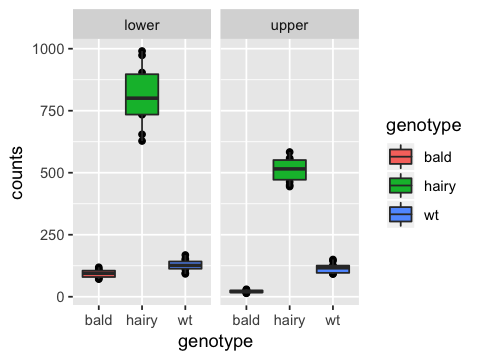

In [68]:
# we facet the plot so that it separates the upper and lower leaf side
ggplot(df.tidy,mapping = aes(x = genotype,y=counts,fill=genotype)) +
geom_point() +
geom_boxplot() + 
facet_wrap(. ~ side)

# ANOVA

**Question**: what would you test ?

## Genotype

Let's test the effect of the genotype as it seems that it has the most important effect. 

The ANOVA compares the means of trichome counts among the different genotypes. Then checks if differences are statistically significant. Here are my null and alternative hypothesis:
- H0: all genotypes have the same number of trichomes. 
- H1: not all genotypes have the same number of trichomes. 

In [73]:
aov_genotype = aov(formula = counts ~ genotype,data = df.tidy)
suaov_genotype

Call:
   aov(formula = counts ~ genotype, data = df.tidy)

Terms:
                genotype Residuals
Sum of Squares   4402761    642642
Deg. of Freedom        2        57

Residual standard error: 106.1811
Estimated effects may be unbalanced

In [72]:
?aov